### Class Imbalance
- Undersampling
- oversampling
- SMOTE

- Ref: imbalance-learn from scikit learn documentation

In [1]:
import numpy as np
import pandas as pd

np.random.seed(1) ## seed for reproducibility

In [2]:
no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples * class_0_ratio)
no_class_1= no_samples - no_class_0


In [3]:
no_class_0

900

In [4]:
no_class_1

100

In [5]:
np.random.normal(0,1,no_class_0)

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

In [6]:
len(np.random.normal(0,1,no_class_0))

900

#### Preparing dataset for class_0

In [7]:
class_0 = {'feature1': np.random.normal(0,1,no_class_0),
'feature2': np.random.normal(0,1,no_class_0),
'target': [0]*no_class_0}

In [8]:
class_0

{'feature1': array([-1.30797134e+00,  1.47239631e+00,  7.48760979e-02, -1.78693540e+00,
         1.65210587e-01,  9.76296298e-01, -6.96027671e-01,  1.93713158e+00,
         1.34922768e+00, -1.27511386e+00,  1.00909026e+00,  1.11972687e-01,
        -5.51680244e-01, -3.16631643e-01, -4.44995003e-01, -1.21627102e+00,
        -4.48323107e-01,  6.92688912e-01,  1.42594203e+00,  1.45833834e+00,
        -5.73360729e-01, -1.17247677e-01, -8.59371317e-01,  1.03000249e+00,
        -1.64815292e+00, -1.36327656e+00, -6.35846699e-01,  2.51473444e-01,
        -3.21147980e-01,  3.30639057e-02,  4.75346222e-02,  2.33279727e-01,
        -1.03446298e+00, -3.39359771e-01,  5.77612336e-01,  2.80229156e-01,
         1.09330663e+00, -7.46224275e-01,  9.06261413e-01,  1.46662474e+00,
        -1.42590292e-01,  2.65930144e-01,  2.25189434e-01,  5.35670589e-01,
         3.87921115e-01,  1.46948771e+00,  5.13364936e-01,  8.64501704e-01,
         3.31526731e-01, -1.04177028e+00,  4.33360352e-01, -2.29956023e-01,


In [9]:
class_0 = pd.DataFrame(class_0)

In [10]:
class_0

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


#### Preparing dataset for class_1

In [11]:
class_1 = {'feature1': np.random.normal(3,1,no_class_1),
'feature2': np.random.normal(3,1,no_class_1),
'target': [1]*no_class_1}

In [12]:
class_1 = pd.DataFrame(class_1)
class_1

,feature1,feature2,target
0,2.901181,3.613719,1
1,2.729851,2.917747,1
2,4.745068,2.855780,1
3,2.819442,3.792378,1
4,2.797622,2.697728,1
...,...,...,...
95,2.247285,4.236735,1
96,4.360377,4.116299,1
97,3.386375,3.675240,1
98,3.388515,3.022452,1


#### concatinating the dataframes

In [13]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [14]:
df.target.value_counts()

0    900
1    100
Name: target, dtype: int64

In [15]:
df.target.value_counts(normalize=True)

0    0.9
1    0.1
Name: target, dtype: float64

In [16]:
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]

In [17]:
df_majority

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


## Oversampling

- upslilling the minority dataset to manjority

In [18]:
from sklearn.utils import resample

In [19]:
df_monority_upsample = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=1)

In [20]:
df_monority_upsample

,feature1,feature2,target
937,1.357980,1.436963,1
912,3.031925,4.110404,1
972,1.820175,4.590844,1
909,2.810210,2.061396,1
975,2.339504,3.891213,1
...,...,...,...
936,4.228505,3.963701,1
998,3.388515,3.022452,1
901,2.729851,2.917747,1
932,3.855587,3.597946,1


In [21]:
df_monority_upsample.shape

(900, 3)

In [22]:
## 800 shows that 100 minor samples are repeated 8 times making it 800 to overall 900
df_monority_upsample.duplicated().sum()

800

In [23]:
df_upsample = pd.concat([df_majority, df_monority_upsample])

In [24]:
df_upsample

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
936,4.228505,3.963701,1
998,3.388515,3.022452,1
901,2.729851,2.917747,1
932,3.855587,3.597946,1


## Undersmapling

- Creating the Major dataset count to minor dataset count, i.e 900 to 100 

In [25]:
df_mojority_downsample = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=1)

In [26]:
df_mojority_downsample

,feature1,feature2,target
860,-1.537535,0.122837,0
880,-0.838450,-1.586623,0
874,-0.771039,-1.448482,0
780,-2.018355,0.502019,0
525,-0.521316,0.452069,0
...,...,...,...
494,1.152007,0.781319,0
255,-0.241664,0.297858,0
672,-0.999110,-0.053589,0
481,-0.080607,-0.644226,0


In [27]:
df_mojority_downsample.shape

(100, 3)

In [28]:
df_mojority_downsample.duplicated().sum()

0

In [29]:
df_downsample = pd.concat([df_minority, df_mojority_downsample])
df_downsample

,feature1,feature2,target
900,2.901181,3.613719,1
901,2.729851,2.917747,1
902,4.745068,2.855780,1
903,2.819442,3.792378,1
904,2.797622,2.697728,1
...,...,...,...
494,1.152007,0.781319,0
255,-0.241664,0.297858,0
672,-0.999110,-0.053589,0
481,-0.080607,-0.644226,0


## SMOTE - Synthetic Minority Oversampling Technique

In [30]:
from sklearn.datasets import make_classification

In [31]:
X,y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=1)

In [32]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [33]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
### below is class imbalance

In [35]:
len(y[y==0])

894

In [36]:
len(y[y==1])

106

In [37]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

df_final= pd.concat([df1,df2], axis=1)
df_final

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [38]:
df_final.target.value_counts()

0    894
1    106
Name: target, dtype: int64

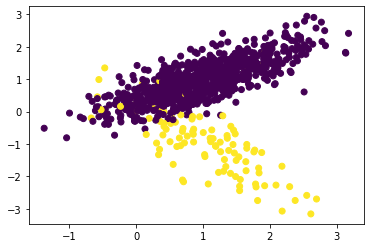

In [39]:
import matplotlib.pyplot as plt
plt.scatter(df_final['f1'], df_final['f2'], c = df_final['target'])

In [40]:
!pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
  Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-1.0.1.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [41]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
  Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-1.0.1.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [43]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
oversample = SMOTE()

In [ ]:
X, y = oversample.fit_resample(df_final[['f1', 'f2']], df_final['target'])

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
len(y[y==0])

In [ ]:
len(y[y==1])

In [ ]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

oversample= pd.concat([df1,df2], axis=1)
oversample

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(oversample['f1'], oversample['f2'], c = oversample['target'])